In [1]:
!pip install plotly==5.3.1

In [2]:
!pip install cufflinks

In [3]:
!pip install folium

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline


import plotly
import plotly.express as px
import plotly.graph_objects as go # uses ploty and matplolip in a Object orientated manner
plt.rcParams['figure.figsize'] = 17,8 

import cufflinks as cf # it acts as a wrapper, works well with pandas and matplolib
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot
import folium # used for geographical maps


### Connect Plotly with the notebook

In [5]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Import Dataset

In [6]:
df = pd.read_excel('Dataset/Covid cases in India.xlsx')

In [7]:
df.head(7)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2


In [8]:
df.tail()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
21,22,West Bengal,11,0,0,1
22,23,Bihar,7,0,0,1
23,24,Mizoram,1,0,0,0
24,25,Goa,6,0,0,0
25,26,Manipur,1,0,0,0


In [9]:
# since we do not need the serial no. column we gonna drop it
df = df.drop(['S. No.'], axis=1)
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


### Numerical Representation

In [10]:
# we need to add anaother column that will carry the total number of cases in each state
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
df.head(10)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [11]:
# total nummber of all cases in india 
total_cases_overall = df['Total Cases'].sum()
print("The total number of overall cases in India until now is : ", total_cases_overall)

The total number of overall cases in India until now is :  729


In [12]:
# active cases in each state
#cured_death_cases = 
active_cases = df['Total Cases'] - (df['Cured'] + df['Death'])
df['Active Cases'] = active_cases
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [13]:
# to present the table in a well formatted way and to easily peruse through which state has high number, we can use the backgroud
# style that gives us colors in each row, darker if the number is large, lighter if the number is small.
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
Total_active_cases = df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()
Total_active_cases

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Gujarat,43
Rajasthan,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [15]:
Total_active_cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Gujarat,43
Rajasthan,43
Delhi,39
Tamil Nadu,35
Haryana,30


### Graphical Representation

<AxesSubplot:xlabel='Name of State / UT'>

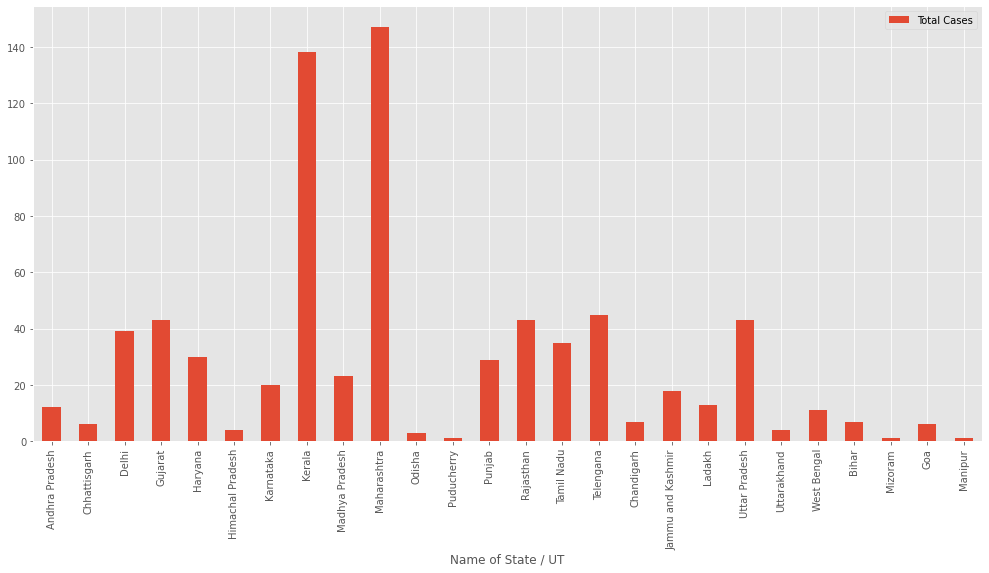

In [16]:
# simple pandas visualization
df.plot(kind='bar', x='Name of State / UT', y='Total Cases')

<BarContainer object of 26 artists>

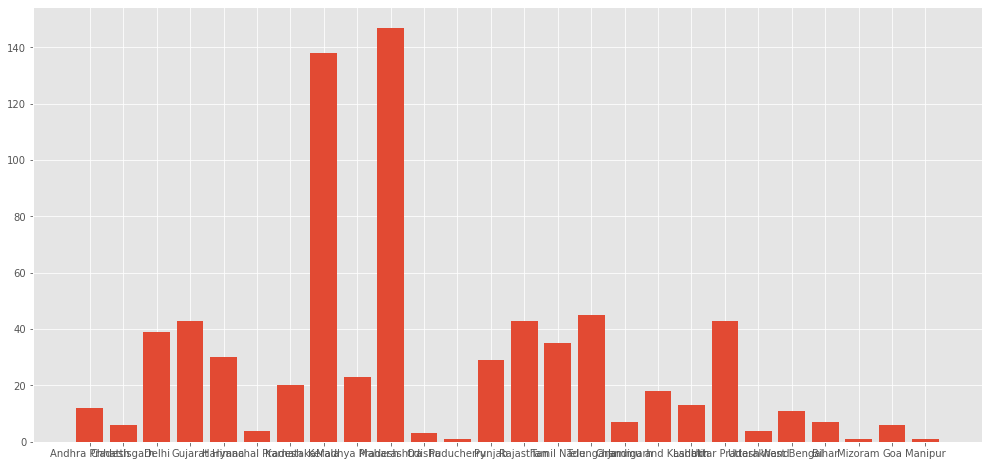

In [17]:
# matplolib viz
plt.bar(df['Name of State / UT'], df['Total Cases'])

In [18]:
#Plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

In [19]:
# ploty express
px.bar(df,x='Name of State / UT',y='Total Cases')

<AxesSubplot:xlabel='Name of State / UT', ylabel='Total Cases'>

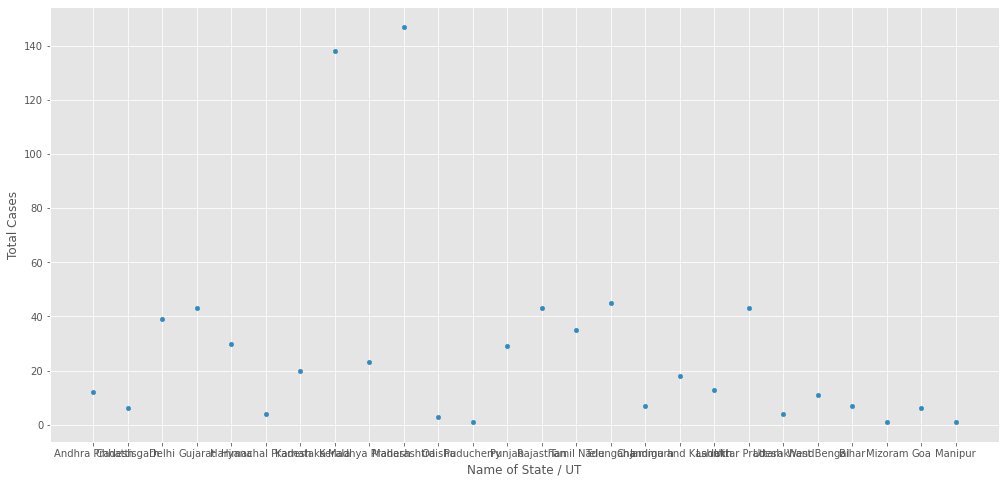

In [20]:
# scatter plot using pandas
df.plot(kind = 'scatter',x='Name of State / UT',y='Total Cases' )

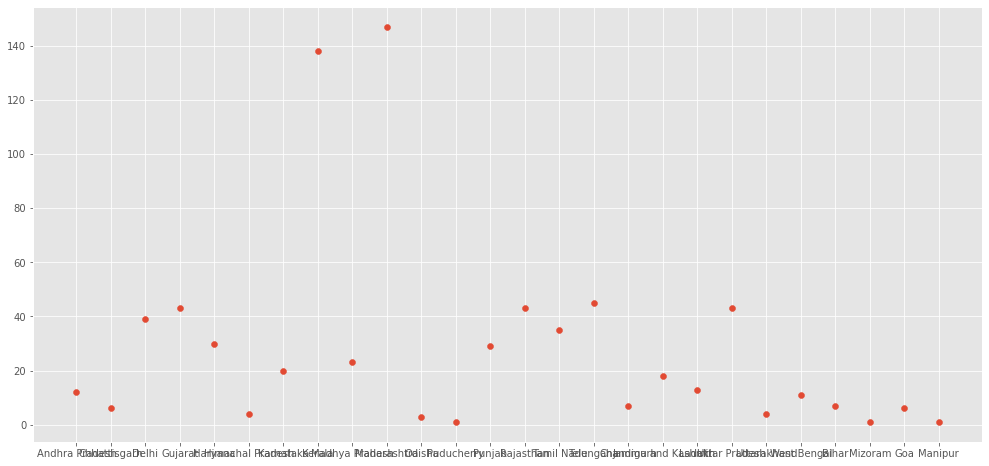

In [21]:
# using matplotlib
plt.scatter(df['Name of State / UT'], df['Total Cases'])

In [22]:
# plotly
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases', mode = 'markers+lines', title='My Graph',xTitle='Name of State / UT',yTitle='Total Cases', colors='red',size=20)
# plotly express
px.scatter(df,x='Name of State / UT',y='Total Cases')

### Object Orientated Viz

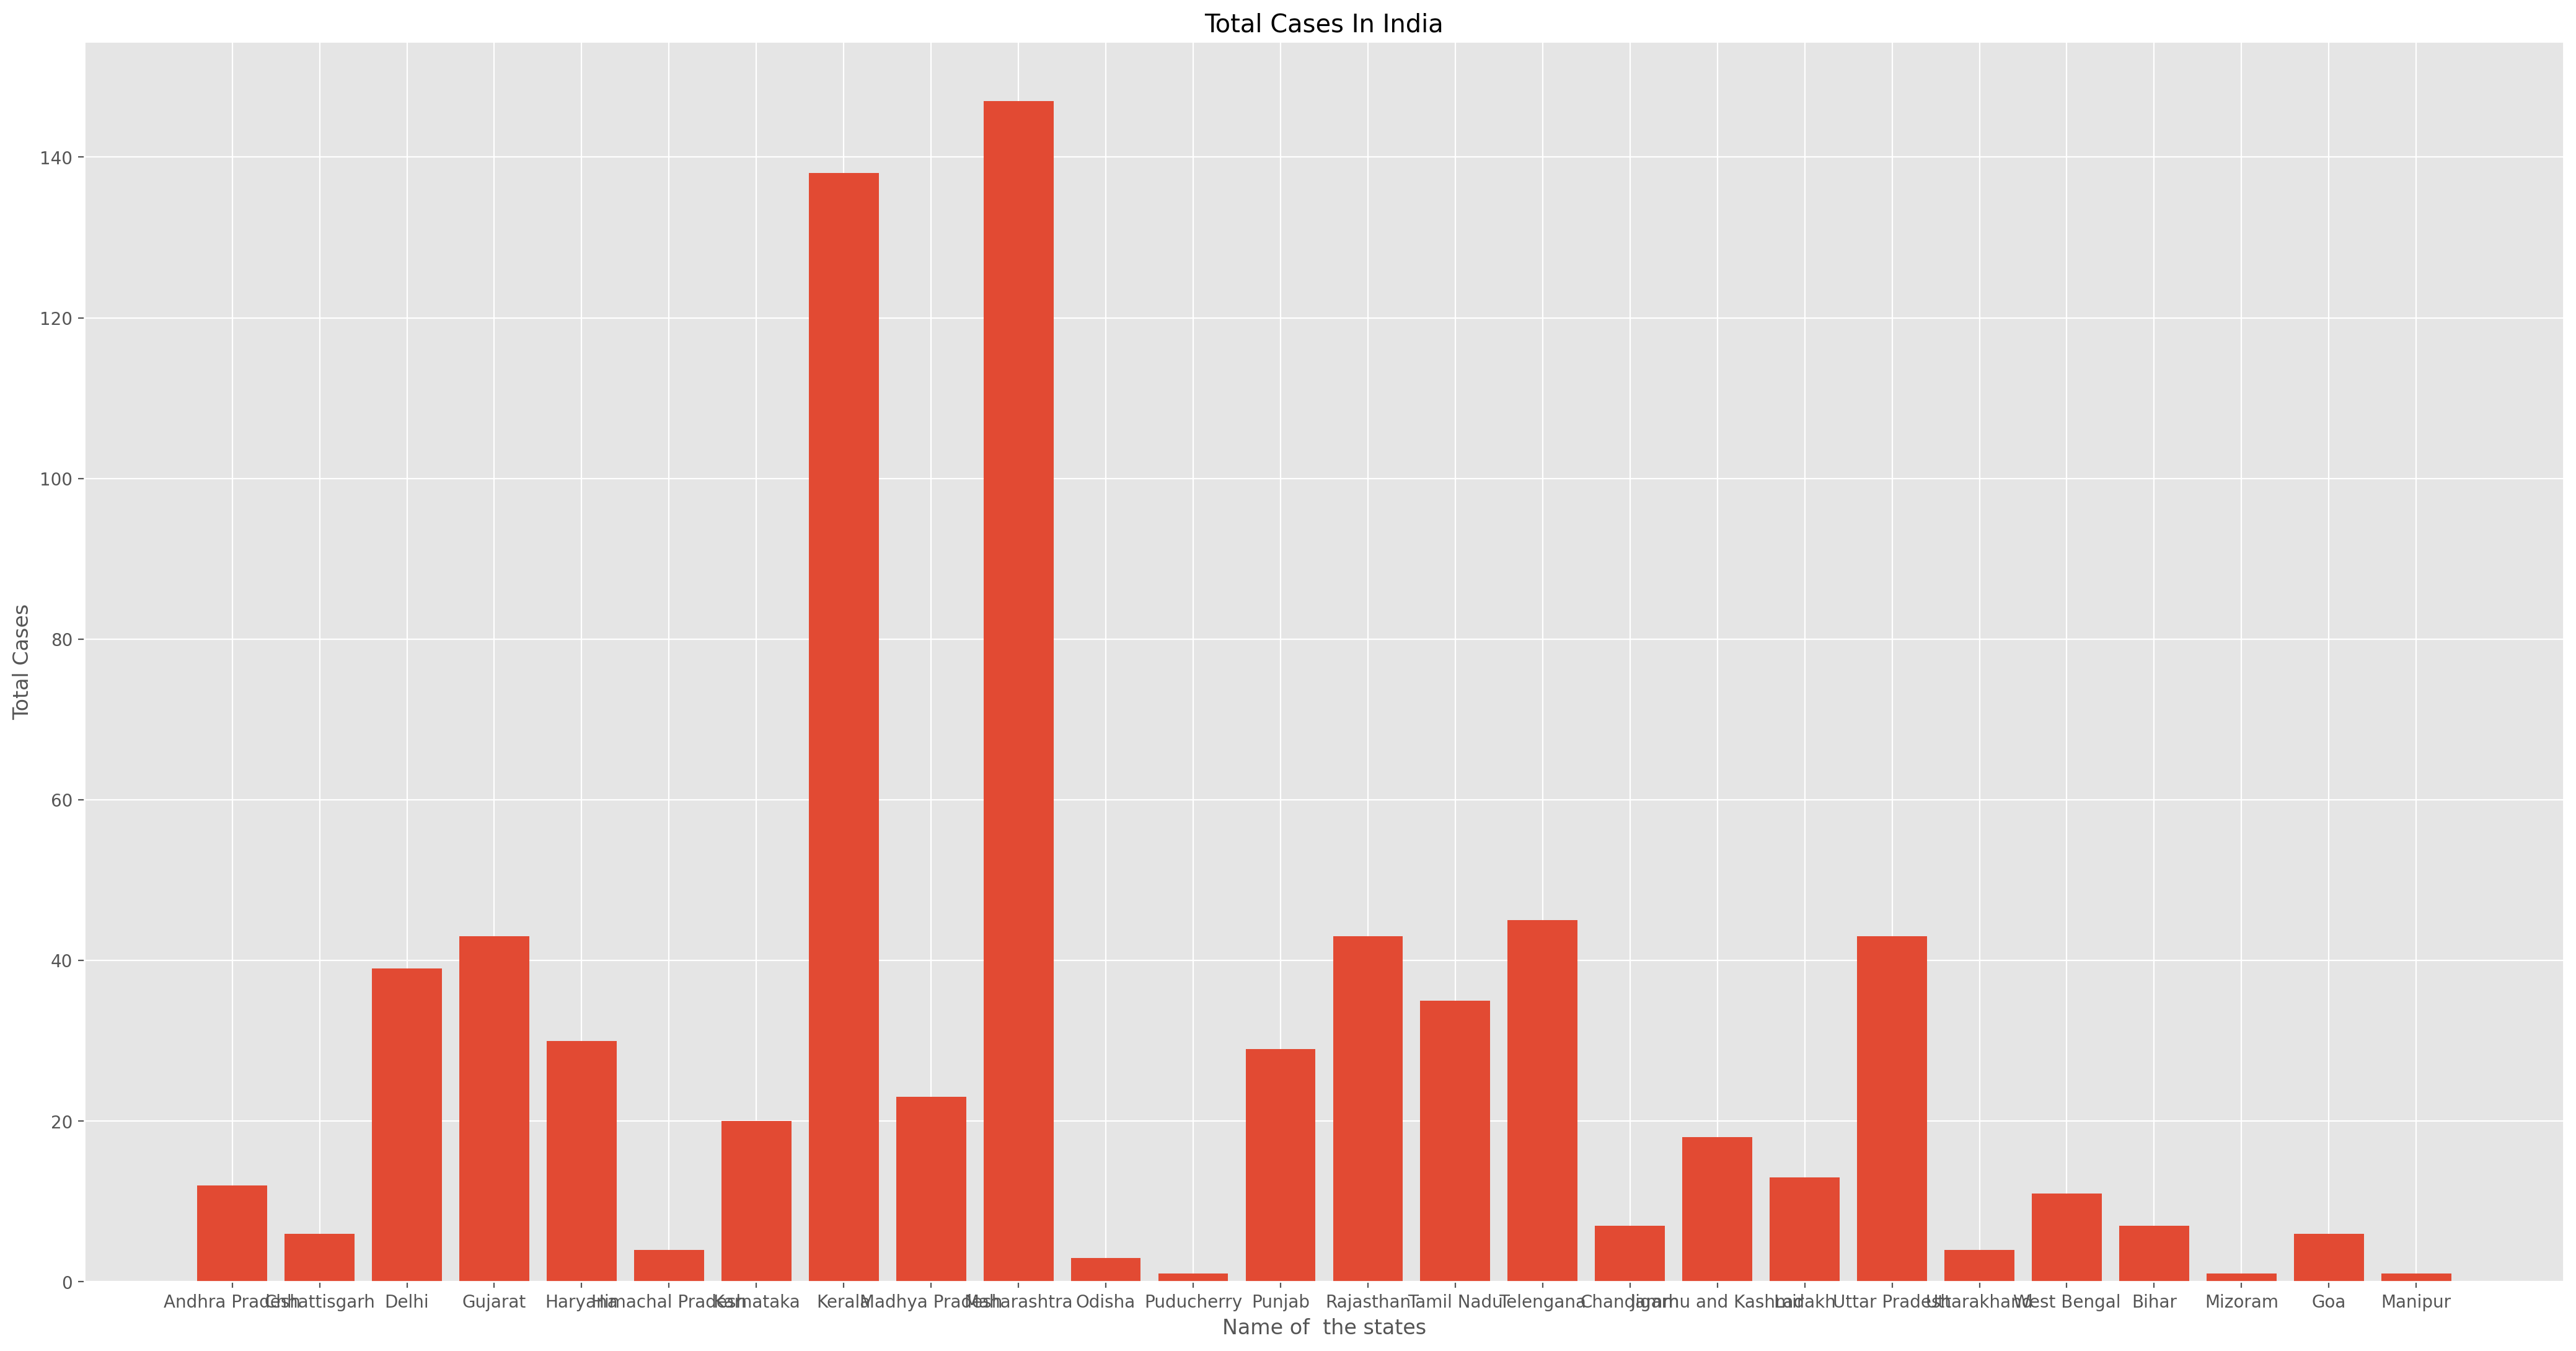

In [23]:
# matplolib
fig = plt.figure(figsize = (20,10), dpi=200)
axes = fig.add_axes([0, 0, 1, 1]) # creating a canvas
# draw plot
axes.bar(df['Name of State / UT'], df['Total Cases'])
axes.set_title("Total Cases In India")
axes.set_xlabel("Name of  the states")
axes.set_ylabel("Total Cases")
plt.show()

# plolty oo viz
fig = go.Figure()
fig.add_trace(go.Bar(x = df['Name of State / UT'], y = df['Total Cases']))
fig.update_layout(title = 'Total Cases In India', xaxis = dict(title='Name of State / UT'), yaxis = dict(title='Total Cases'))

### Import India Coordinates Dataset

In [24]:
Indian_cord = pd.read_excel('Dataset/Indian Coordinates.xlsx')
Indian_cord.head(7)

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman And Nicobar,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN
5,Chandigarh,30.719997,76.780006,NaN
6,Chhattisgarh,22.090420,82.159987,NaN


In [25]:
Indian_cord.drop(['Unnamed: 3'], axis =1, inplace=True)
Indian_cord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [26]:
Indian_cord.tail(7)

,Name of State / UT,Latitude,Longitude
28,Telengana,18.112400,79.019300
29,Tamil Nadu,12.920386,79.150042
30,Tripura,23.835404,91.279999
31,Uttar Pradesh,27.599981,78.050006
32,Uttarakhand,30.320409,78.050006
33,West Bengal,22.580390,88.329947
34,Union Territory of Ladakh,34.100000,77.340000


In [27]:
# merge two dataframes together
df_full = pd.merge(Indian_cord, df, on='Name of State / UT')
df_full.head(10)

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [28]:
# creatingt the map
map = folium.Map(location=[20,70], tiles='Stamenterrain', zoom_start=4)

for lat,long, value,name in zip(df_full['Latitude'],  df_full['Longitude'], df['Total Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, long], radius= value*0.8, popup=('<strong>state</strong>: '+ str(name).capitalize()+ '<br>''<strong> Total Cases</strong>: ' +
                                                              str(value)+ '<br>'), color = 'red', fill_color = 'red', fill_opacity = 0.3).add_to(map)
    

In [29]:
map

### How corona virus is rising Globaly

### Import Dataset of Per Cases Per Day

In [30]:
per_day_India = pd.read_excel('Dataset/per_day_cases.xlsx', parse_dates=True, sheet_name = 'India')
per_day_Italy = pd.read_excel('Dataset/per_day_cases.xlsx', parse_dates=True, sheet_name = 'Italy')
per_day_Korea = pd.read_excel('Dataset/per_day_cases.xlsx', parse_dates=True, sheet_name = 'Korea')
per_day_Wuhan = pd.read_excel('Dataset/per_day_cases.xlsx', parse_dates=True, sheet_name = 'Wuhan')

In [31]:
per_day_India.head(10)

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


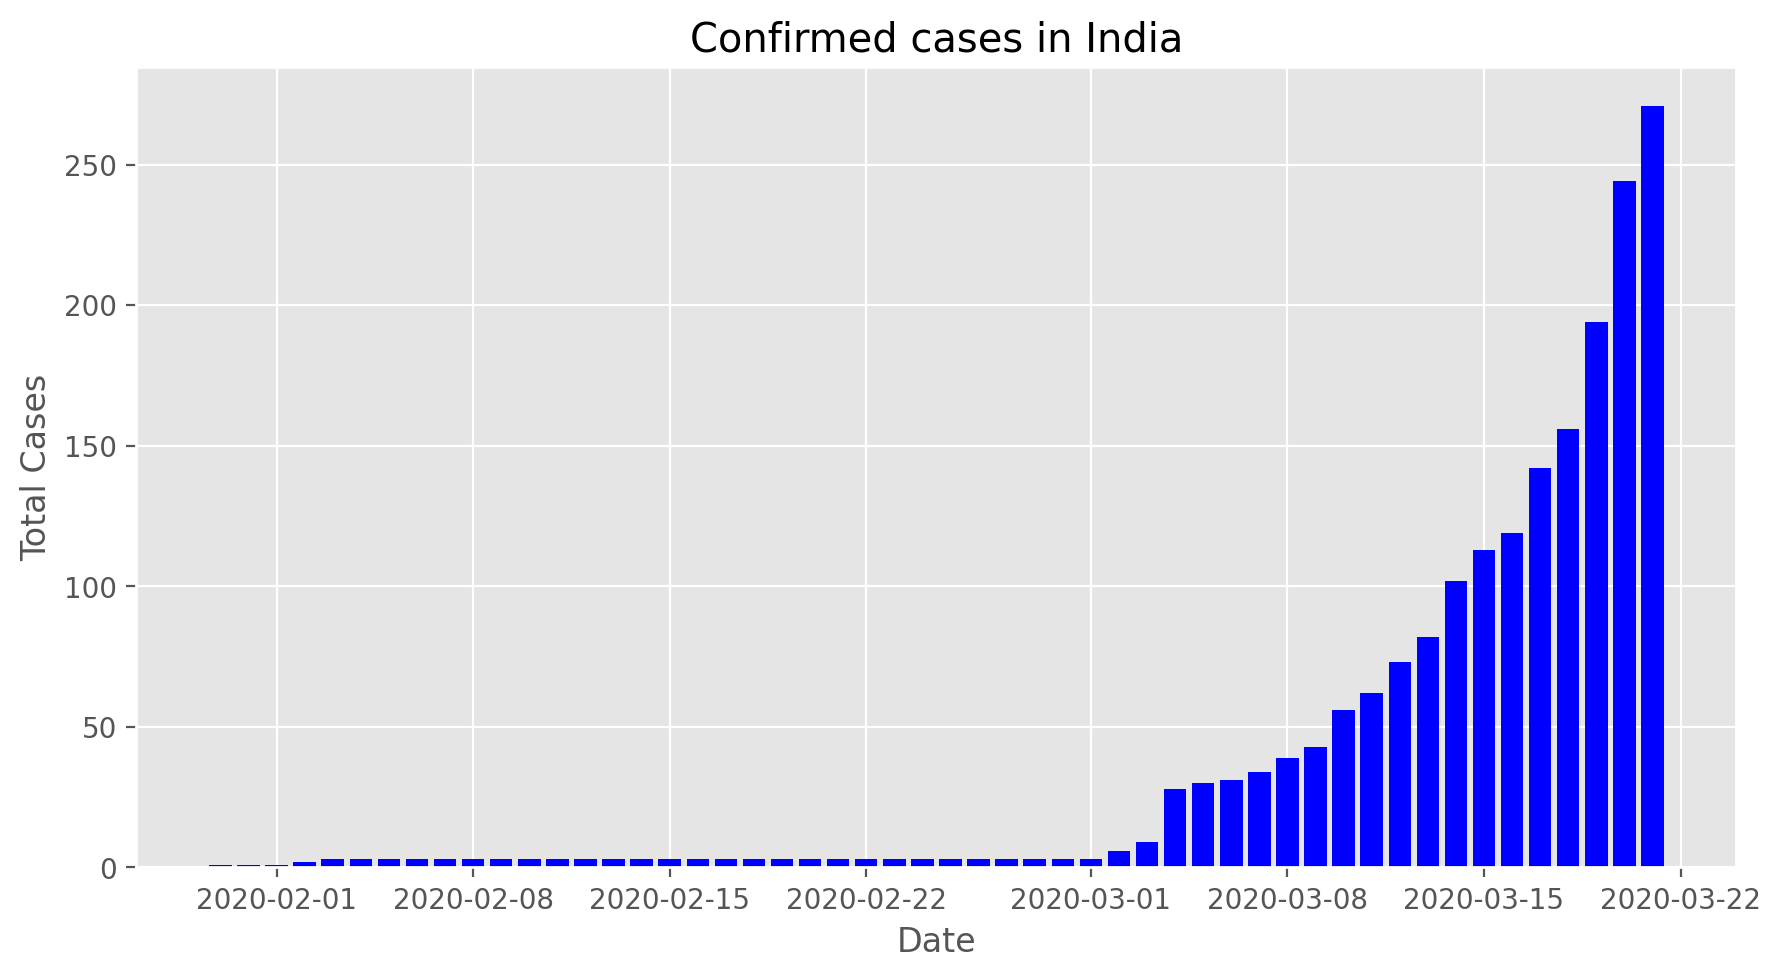

In [32]:
# Analysis using matplolib viz
fig = plt.figure(figsize=(10,5), dpi = 200)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.bar(per_day_India['Date'], per_day_India['Total Cases'], color = 'blue')
axes.set_title("Confirmed cases in India")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
plt.show()


In [33]:
# plotly express viz
fig=px.bar(per_day_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [34]:
fig=px.bar(per_day_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.show()
fig=px.bar(per_day_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.show()
fig=px.bar(per_day_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.show()

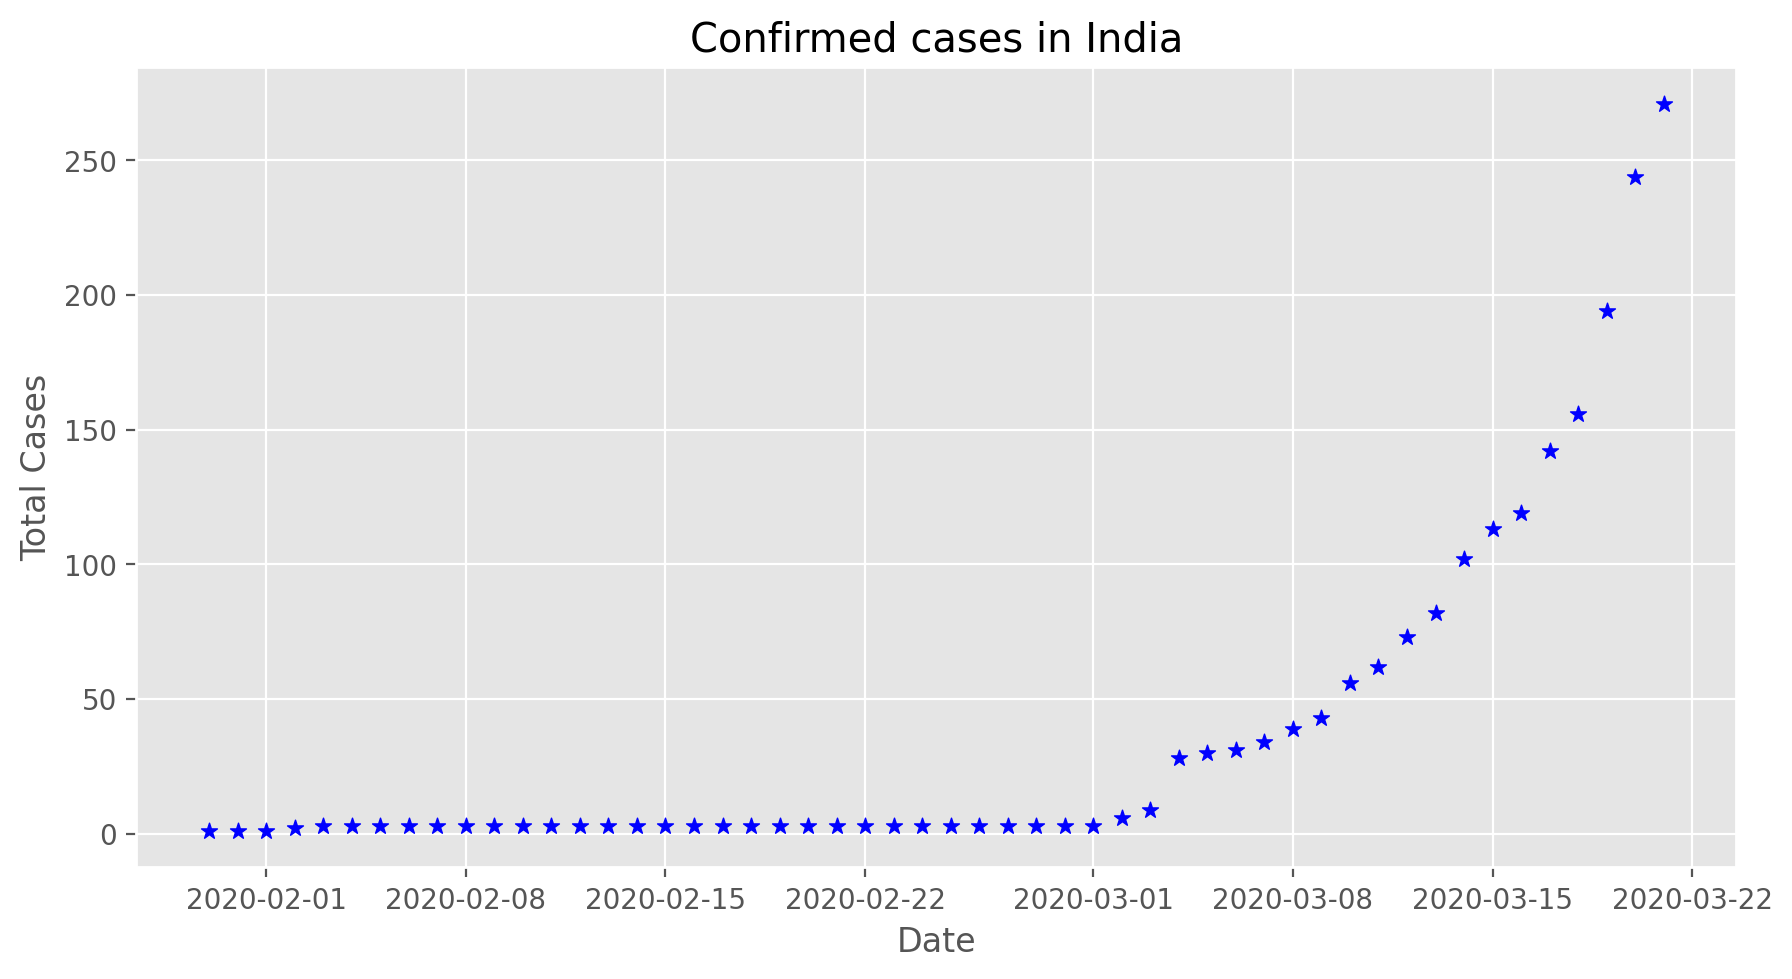

In [35]:
# scatter plotting
fig = plt.figure(figsize=(10,5), dpi = 200)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(per_day_India['Date'], per_day_India['Total Cases'], color = 'blue', marker='*')
axes.set_title("Confirmed cases in India")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
plt.show()

In [36]:
# plotly express scatter plot
fig=px.scatter(per_day_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

In [37]:
#Plotly
per_day_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

In [38]:
# plolty OO graphs
fig=go.Figure()
fig.add_trace(go.Scatter(x=per_day_India['Date'],y=per_day_India['Total Cases'],mode='lines+markers'))

### Subplots using Bar Graph

In [39]:
from plotly.subplots import make_subplots

In [40]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=per_day_Korea['Date'],y=per_day_Korea['Total Cases'],
                    marker=dict(color=per_day_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=per_day_Italy['Date'],y=per_day_Italy['Total Cases'],
                    marker=dict(color=per_day_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=per_day_India['Date'],y=per_day_India['Total Cases'],
                    marker=dict(color=per_day_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=per_day_Wuhan['Date'],y=per_day_Wuhan['Total Cases'],
                    marker=dict(color=per_day_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [41]:
# scatter subplots
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=per_day_Korea['Date'],y=per_day_Korea['Total Cases'],
                    marker=dict(color=per_day_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=per_day_Italy['Date'],y=per_day_Italy['Total Cases'],
                    marker=dict(color=per_day_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=per_day_India['Date'],y=per_day_India['Total Cases'],
                    marker=dict(color=per_day_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=per_day_Wuhan['Date'],y=per_day_Wuhan['Total Cases'],
                    marker=dict(color=per_day_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

### World Coronavirus

### Import Dataset for Covid 19 Cases Worldwide

In [42]:
df_world = pd.read_csv('Dataset/covid_19_data.csv', parse_dates=['Last Update'])

In [43]:
df_world.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [44]:
df_world.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df_world.head(20)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [45]:
# use datadframe to query data for country UK
df_world.query('Country=="UK"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
817,818,02/05/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
888,889,02/06/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
957,958,02/07/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1029,1030,02/08/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0
1101,1102,02/09/2020,NaN,UK,2020-02-07 18:33:02,3.0,0.0,0.0


In [46]:
df_world.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [47]:
# on a particular date, how many cases happened in the whole world
confirmed=df_world.groupby('Date').sum()['Confirmed'].reset_index()
death=df_world.groupby('Date').sum()['Deaths'].reset_index()
recovered=df_world.groupby('Date').sum()['Recovered'].reset_index()

In [48]:
confirmed

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
5,01/27/2020,2927.0
6,01/28/2020,5578.0
7,01/29/2020,6165.0
8,01/30/2020,8235.0
9,01/31/2020,9925.0


In [49]:
death

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0
2,01/24/2020,26.0
3,01/25/2020,42.0
4,01/26/2020,56.0
5,01/27/2020,82.0
6,01/28/2020,131.0
7,01/29/2020,133.0
8,01/30/2020,171.0
9,01/31/2020,213.0


In [50]:
recovered

,Date,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0
2,01/24/2020,36.0
3,01/25/2020,39.0
4,01/26/2020,52.0
5,01/27/2020,61.0
6,01/28/2020,107.0
7,01/29/2020,126.0
8,01/30/2020,143.0
9,01/31/2020,222.0


In [51]:
# a scatter plot to show the cases of deaths, recovery and confirmed cases in the world based on dates
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',
                         line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',
                         line=dict(color='red',width=2)))

fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode='lines+markers',name='Recovered',
                         line=dict(color='green',width=2)))

### Import Dataset for Confirmed cases 

In [52]:
df_confirmed = pd.read_csv('Dataset/time_series_covid_19_confirmed.csv')

In [53]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [54]:
# change the column name of country/region
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [55]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [56]:
# merge the orginal dataset with the df confirmed
df_latlong=pd.merge(df_world,df_confirmed,on=['Country','Province/State'])
df_latlong.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [ ]:
# the map with the frame date
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],
                      animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)

fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


### Questions 

- What is the total number of cases(combined foreign and national) of each state ?
- Number of cases in total in India?
- Number of active cases?
- Highest total cases and their states?

### Data Analysis Summary